Epochs:   0%|          | 0/50 [00:00<?, ?it/s]

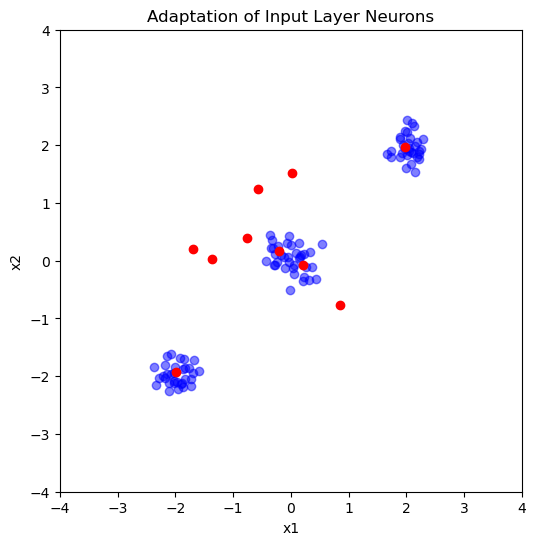

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from spiking_feast import SpikingFEAST
import torch
from tqdm.notebook import tqdm

torch.set_grad_enabled(False)

input_dim = 2
num_neurons = 10
theta_open = 1e-4
learning_rate = 1e-3
num_epochs = 1000

input_layer = SpikingFEAST(input_size=input_dim, num_neurons=num_neurons, lr=10)

# Simulated dataset with three probability density functions (PDF)
dataset = torch.randn(100, input_dim) * 0.2
dataset[:33] += 2
dataset[33:66] -= 2

num_epochs: int = 50
num_trials = len(dataset)
num_samples = num_epochs * num_trials

weights_history = torch.zeros(num_samples, num_neurons, input_dim)
threshold_history = torch.zeros(num_samples, num_neurons)

sample: int = 0
for epoch in tqdm(range(num_epochs), desc='Epochs'):
	for i, observation in enumerate(dataset):
		activation = input_layer(observation)
		weights_history[i + epoch * len(dataset)] = input_layer.weights.detach()
		threshold_history[i + epoch * len(dataset)] = input_layer.thresholds.detach()

# Create the figure and axes
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Adaptation of Input Layer Neurons')
ax.set_aspect('equal', adjustable='box')

dataset_scatter = ax.scatter(dataset[:,0], dataset[:,1], c='b', marker='o', alpha=0.5) # type: ignore
weights_scatter = ax.scatter(weights_history[-1,:,0], weights_history[-1,:,1], c='r', marker='o') # type: ignore
circles = [plt.Circle(weights_history[-1,i], threshold_history[-1,i], color='b', fill=False) for i in range(num_neurons)] # type: ignore


# # Initialize the scatter plot for weights and circles for thresholds
# weights_scatter = ax.scatter([], [], c='r', marker='o') # type: ignore
# dataset_scatter = ax.scatter([], [], c='b', marker='o', alpha=0.5) # type: ignore
# circles = [plt.Circle((0, 0), 0, color='b', fill=False) for _ in range(num_neurons)] # type: ignore


# # Function to update the scatter plot and circles
# def update(frame):
# 	weights_scatter.set_offsets(weights_history[frame])
# 	dataset_scatter.set_offsets(dataset[frame])
# 	for i in range(num_neurons):
# 		circles[i].center = weights_history[frame, i]
# 		circles[i].radius = threshold_history[frame, i]
# 		ax.add_patch(circles[i])

# # Create the animation
# animation = FuncAnimation(fig, update, frames=len(dataset), interval=num_epochs, repeat=False)
# animation.save('spiking_feast.gif', dpi=80, writer='imagemagick')